In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import math

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM,Dropout

plt.rcParams['xtick.labelsize'] = 24
plt.rcParams['ytick.labelsize'] = 24
plt.rcParams.update({'font.size':20})
plt.rcParams["figure.figsize"] = (12,10)

In [3]:
str_files = ''
#Carrega os dados do arquivo .csv
df = pd.read_csv(str_files + "cetesb_concatenado10_sem_outlier.csv",encoding='utf-8',sep=',')
trainingd = df

In [4]:
#Seleciona os dados da UGRHI 10 - SOROCABA/MEDIO TIETE
z = df.loc[df['UGRHI'] == '10 - SOROCABA/MEDIO TIETE']

In [8]:
def pegar_dados_coluna_predita_train_test(trainingd,percent,index_coluna):
    data = trainingd.iloc[:,:].values
    train = trainingd.iloc[0:int(len(data)*percent),:].values  
    train_previsao = trainingd.iloc[0:int(len(data)*percent),index_coluna:index_coluna+1].values
    test = trainingd.iloc[len(train):,index_coluna:index_coluna+1].values
    
    print('Observações.:',len(data))
    print('Treino.:',len(train))
    print('Test.:',len(test))
    
    return train,train_previsao, test

#Normalização dos dados: Normaliza os dados dentro um intervalo (0 a 1).
def normalizacao(train,test):
    sc = MinMaxScaler()
    testd = test
    train = sc.fit_transform(train)
    test = sc.fit_transform(test)    
    return train,test,testd

def prepara_dados_treino(trainingd,train,test,lags):
    #Prepara os dados de teste
    entradas = trainingd[:len(trainingd) - len(test) - lags].values
    entradas = sc.fit_transform(entradas)  
    
        
    test_X = []
    for i in range(lags, lags+len(train)):
        test_X.append(entradas[i-lags:i, 0:8])
    test_X = np.array(test_X)
        
    return test_X
    

#Prepara o conjunto de dados em X e y, considerando a janela de visualização (lags).
#cy = coluna que será predita
def prepara_dados(dados,lags,cy):
    X = []
    y = []
    for i in range(lags, len(dados)):
        X.append(dados[i-lags:i,0:8])
        y.append(dados[i, cy])
       
    return np.array(X), np.array(y)

#Calcula o MAPE
#Define função para calcular o MAPE
#def mape(y_pred,y_true):
 #   return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def mape(y_pred,y_true):
    mape_sum = 0
    for real,prediction in zip(y_true,y_pred):
        mape_sum += (abs((real - prediction))/real)
        mape = mape_sum/len(real)
    return mape

def rmse(y_pred,y_true):
    mse = mean_squared_error(y_true, y_pred)
    rmse = math.sqrt(mse)
    return rmse

def r2(y_pred,y_true):
    rscore = r2_score(y_true,y_pred)
    return rscore

def rquadrado(y_pred,y_true):
    #Soma Total dos Quadrados (STQ): mostra a variação de y em torno da própria média. 
    #É o somatório das diferenças entre o valor alvo real e sua média elevado ao quadrado.
    y_traco = np.mean(y_true)
    
    print('media y_true:', y_traco)
        
    stq = 0
    
    for s in y_true:
        a = s - y_traco
        st = a * a
        stq = stq + st
    
    print('Soma Total dos Quadrados (STQ):', stq[0])
    
    #Soma dos Quadrados dos Resíduos (SQU): variação de Y que não é explicada pelo modelo elaborado. 
    #É o somatório das diferenças entre o valor predito e o valor real elevados ao quadrado.
    squ = 0
    
    y_traco = np.mean(y_pred)
    print('media y_pred:', y_traco)
    
    for n in range(len(y_true)):
        a = y_true[n] - y_pred[n]
        st = a * a
        squ = squ + st
        
    print('Soma dos Quadrados dos Resíduos (SQU):',squ[0])
    print('\n')
    print('Fórmula do R²')
    print('\n')
    print('sqr = stq - squ')
    sqr = stq[0] - squ[0]
    print('R² = sqr/stq')
    sqr = sqr/stq[0]
    print('\n')
    return sqr

Observações.: 398
Treino.: 278
Test.: 120
Train on 277 samples
Epoch 1/100
277/277 [==============================] - 2s 5ms/sample - loss: 0.5012 - mean_absolute_error: 0.5012
Epoch 2/100
277/277 [==============================] - 0s 123us/sample - loss: 0.4029 - mean_absolute_error: 0.4029
Epoch 3/100
277/277 [==============================] - 0s 129us/sample - loss: 0.3136 - mean_absolute_error: 0.3136
Epoch 4/100
277/277 [==============================] - 0s 147us/sample - loss: 0.2457 - mean_absolute_error: 0.2457
Epoch 5/100
277/277 [==============================] - 0s 139us/sample - loss: 0.2042 - mean_absolute_error: 0.2042
Epoch 6/100
277/277 [==============================] - 0s 132us/sample - loss: 0.1857 - mean_absolute_error: 0.1857
Epoch 7/100
277/277 [==============================] - 0s 137us/sample - loss: 0.1966 - mean_absolute_error: 0.1966
Epoch 8/100
277/277 [==============================] - 0s 135us/sample - loss: 0.1886 - mean_absolute_error: 0.1886
Epoch 9/100

277/277 [==============================] - 0s 129us/sample - loss: 0.1635 - mean_absolute_error: 0.1635
Epoch 71/100
277/277 [==============================] - 0s 145us/sample - loss: 0.1637 - mean_absolute_error: 0.1637
Epoch 72/100
277/277 [==============================] - 0s 135us/sample - loss: 0.1668 - mean_absolute_error: 0.1668
Epoch 73/100
277/277 [==============================] - 0s 134us/sample - loss: 0.1618 - mean_absolute_error: 0.1618
Epoch 74/100
277/277 [==============================] - 0s 139us/sample - loss: 0.1675 - mean_absolute_error: 0.1675
Epoch 75/100
277/277 [==============================] - 0s 137us/sample - loss: 0.1621 - mean_absolute_error: 0.1621
Epoch 76/100
277/277 [==============================] - 0s 139us/sample - loss: 0.1590 - mean_absolute_error: 0.1590
Epoch 77/100
277/277 [==============================] - 0s 141us/sample - loss: 0.1647 - mean_absolute_error: 0.1647
Epoch 78/100
277/277 [==============================] - 0s 134us/sample - los

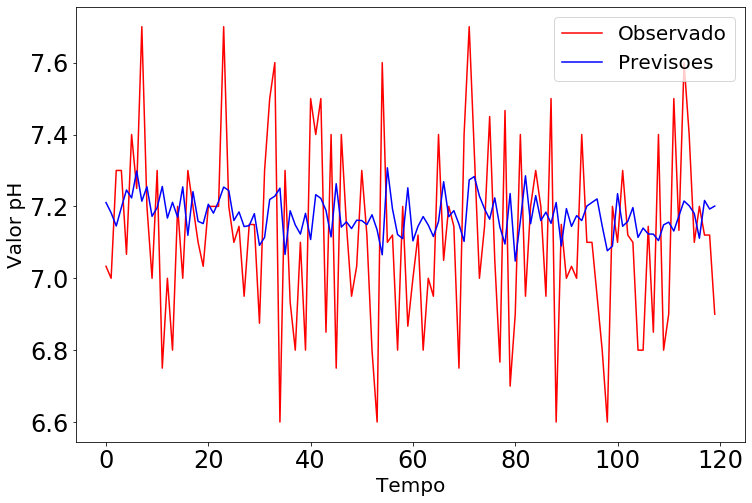

Treinamento - Gráficos com lag 1


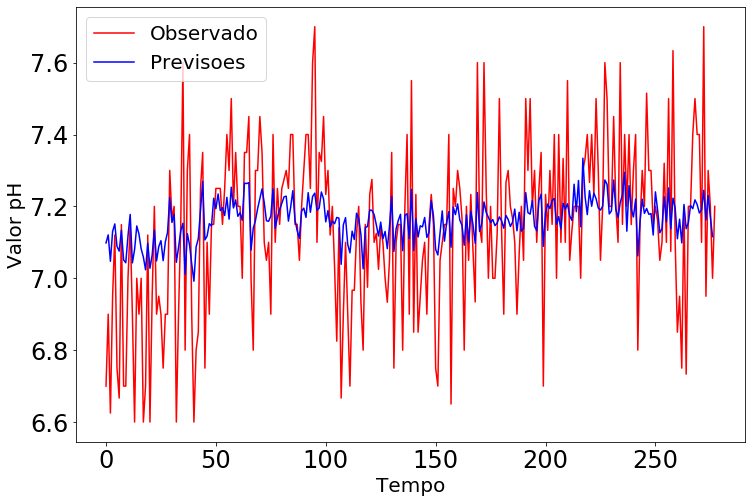

Observações.: 398
Treino.: 278
Test.: 120
Train on 275 samples
Epoch 1/100
275/275 [==============================] - 1s 5ms/sample - loss: 0.4559 - mean_absolute_error: 0.4559
Epoch 2/100
275/275 [==============================] - 0s 130us/sample - loss: 0.3321 - mean_absolute_error: 0.3321
Epoch 3/100
275/275 [==============================] - 0s 168us/sample - loss: 0.2266 - mean_absolute_error: 0.2266
Epoch 4/100
275/275 [==============================] - 0s 186us/sample - loss: 0.1950 - mean_absolute_error: 0.1950
Epoch 5/100
275/275 [==============================] - 0s 163us/sample - loss: 0.1833 - mean_absolute_error: 0.1833
Epoch 6/100
275/275 [==============================] - 0s 178us/sample - loss: 0.1800 - mean_absolute_error: 0.1800
Epoch 7/100
275/275 [==============================] - 0s 156us/sample - loss: 0.1837 - mean_absolute_error: 0.1837
Epoch 8/100
275/275 [==============================] - 0s 158us/sample - loss: 0.1844 - mean_absolute_error: 0.1844
Epoch 9/100

275/275 [==============================] - 0s 176us/sample - loss: 0.1547 - mean_absolute_error: 0.1547
Epoch 71/100
275/275 [==============================] - 0s 194us/sample - loss: 0.1607 - mean_absolute_error: 0.1607
Epoch 72/100
275/275 [==============================] - 0s 160us/sample - loss: 0.1534 - mean_absolute_error: 0.1534
Epoch 73/100
275/275 [==============================] - 0s 169us/sample - loss: 0.1595 - mean_absolute_error: 0.1595
Epoch 74/100
275/275 [==============================] - 0s 180us/sample - loss: 0.1602 - mean_absolute_error: 0.1602
Epoch 75/100
275/275 [==============================] - 0s 140us/sample - loss: 0.1570 - mean_absolute_error: 0.1570
Epoch 76/100
275/275 [==============================] - 0s 190us/sample - loss: 0.1577 - mean_absolute_error: 0.1577
Epoch 77/100
275/275 [==============================] - 0s 136us/sample - loss: 0.1582 - mean_absolute_error: 0.1582
Epoch 78/100
275/275 [==============================] - 0s 189us/sample - los

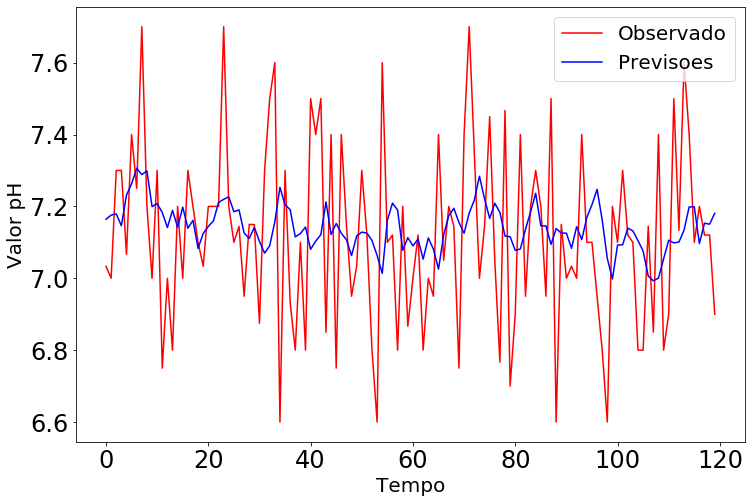

Treinamento - Gráficos com lag 3


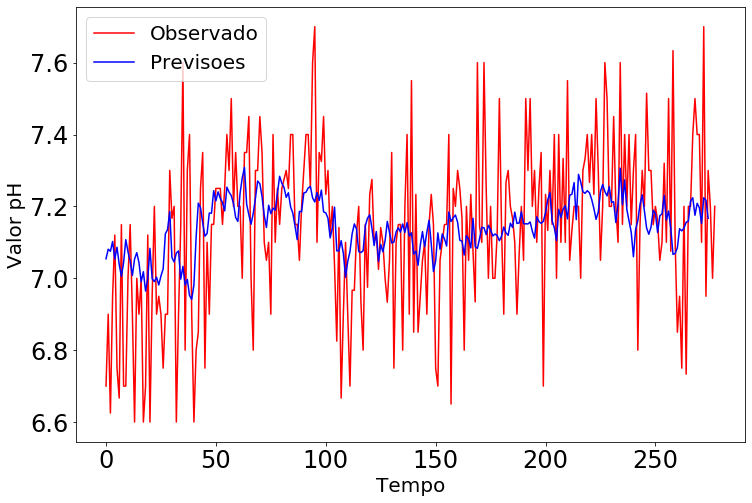

Observações.: 398
Treino.: 278
Test.: 120
Train on 273 samples
Epoch 1/100
273/273 [==============================] - 2s 6ms/sample - loss: 0.6055 - mean_absolute_error: 0.6055
Epoch 2/100
273/273 [==============================] - 0s 166us/sample - loss: 0.3841 - mean_absolute_error: 0.3841
Epoch 3/100
273/273 [==============================] - 0s 161us/sample - loss: 0.2363 - mean_absolute_error: 0.2363
Epoch 4/100
273/273 [==============================] - 0s 168us/sample - loss: 0.2157 - mean_absolute_error: 0.2157
Epoch 5/100
273/273 [==============================] - 0s 158us/sample - loss: 0.2171 - mean_absolute_error: 0.2171
Epoch 6/100
273/273 [==============================] - 0s 189us/sample - loss: 0.1909 - mean_absolute_error: 0.1909
Epoch 7/100
273/273 [==============================] - 0s 166us/sample - loss: 0.1904 - mean_absolute_error: 0.1904
Epoch 8/100
273/273 [==============================] - 0s 161us/sample - loss: 0.1942 - mean_absolute_error: 0.1942
Epoch 9/100

273/273 [==============================] - 0s 168us/sample - loss: 0.1552 - mean_absolute_error: 0.1552
Epoch 71/100
273/273 [==============================] - 0s 181us/sample - loss: 0.1532 - mean_absolute_error: 0.1532
Epoch 72/100
273/273 [==============================] - 0s 187us/sample - loss: 0.1574 - mean_absolute_error: 0.1574
Epoch 73/100
273/273 [==============================] - 0s 180us/sample - loss: 0.1540 - mean_absolute_error: 0.1540
Epoch 74/100
273/273 [==============================] - 0s 161us/sample - loss: 0.1502 - mean_absolute_error: 0.1502
Epoch 75/100
273/273 [==============================] - 0s 159us/sample - loss: 0.1550 - mean_absolute_error: 0.1550
Epoch 76/100
273/273 [==============================] - 0s 186us/sample - loss: 0.1579 - mean_absolute_error: 0.1579
Epoch 77/100
273/273 [==============================] - 0s 167us/sample - loss: 0.1557 - mean_absolute_error: 0.1557
Epoch 78/100
273/273 [==============================] - 0s 176us/sample - los

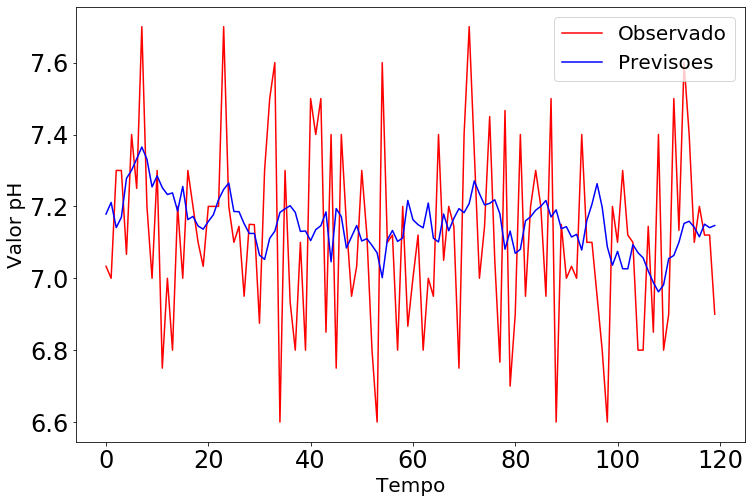

Treinamento - Gráficos com lag 5


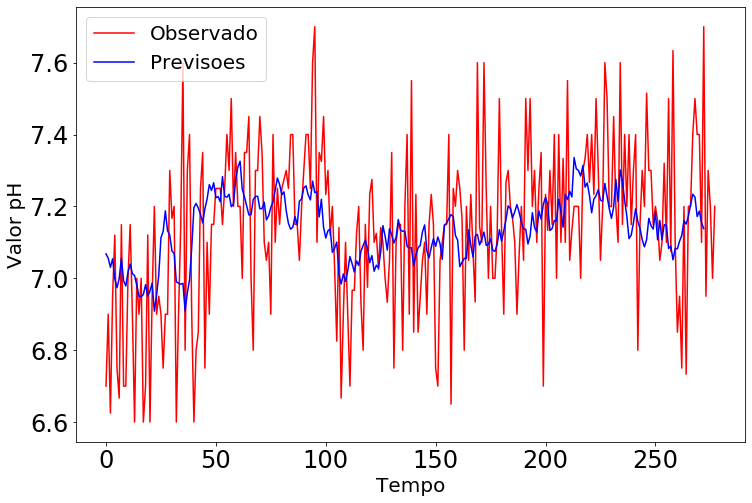

Observações.: 398
Treino.: 278
Test.: 120
Train on 271 samples
Epoch 1/100
271/271 [==============================] - 1s 5ms/sample - loss: 0.5710 - mean_absolute_error: 0.5710
Epoch 2/100
271/271 [==============================] - 0s 214us/sample - loss: 0.3415 - mean_absolute_error: 0.3415
Epoch 3/100
271/271 [==============================] - 0s 180us/sample - loss: 0.2084 - mean_absolute_error: 0.2084
Epoch 4/100
271/271 [==============================] - 0s 213us/sample - loss: 0.2172 - mean_absolute_error: 0.2172
Epoch 5/100
271/271 [==============================] - 0s 182us/sample - loss: 0.1906 - mean_absolute_error: 0.1906
Epoch 6/100
271/271 [==============================] - 0s 185us/sample - loss: 0.1885 - mean_absolute_error: 0.1885
Epoch 7/100
271/271 [==============================] - 0s 214us/sample - loss: 0.1807 - mean_absolute_error: 0.1807
Epoch 8/100
271/271 [==============================] - 0s 195us/sample - loss: 0.1930 - mean_absolute_error: 0.1930
Epoch 9/100

271/271 [==============================] - 0s 232us/sample - loss: 0.1500 - mean_absolute_error: 0.1500
Epoch 71/100
271/271 [==============================] - 0s 238us/sample - loss: 0.1527 - mean_absolute_error: 0.1527
Epoch 72/100
271/271 [==============================] - 0s 229us/sample - loss: 0.1561 - mean_absolute_error: 0.1561
Epoch 73/100
271/271 [==============================] - 0s 181us/sample - loss: 0.1503 - mean_absolute_error: 0.1503
Epoch 74/100
271/271 [==============================] - 0s 211us/sample - loss: 0.1529 - mean_absolute_error: 0.1529
Epoch 75/100
271/271 [==============================] - 0s 206us/sample - loss: 0.1606 - mean_absolute_error: 0.1606
Epoch 76/100
271/271 [==============================] - 0s 212us/sample - loss: 0.1484 - mean_absolute_error: 0.1484
Epoch 77/100
271/271 [==============================] - 0s 186us/sample - loss: 0.1576 - mean_absolute_error: 0.1576
Epoch 78/100
271/271 [==============================] - 0s 213us/sample - los

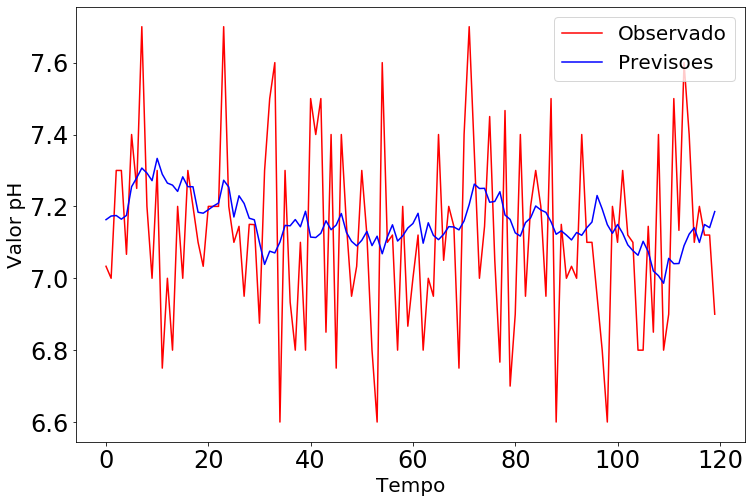

Treinamento - Gráficos com lag 7


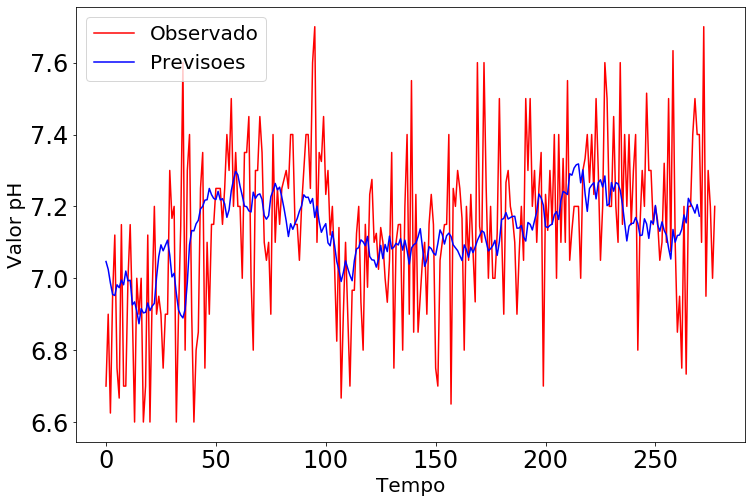

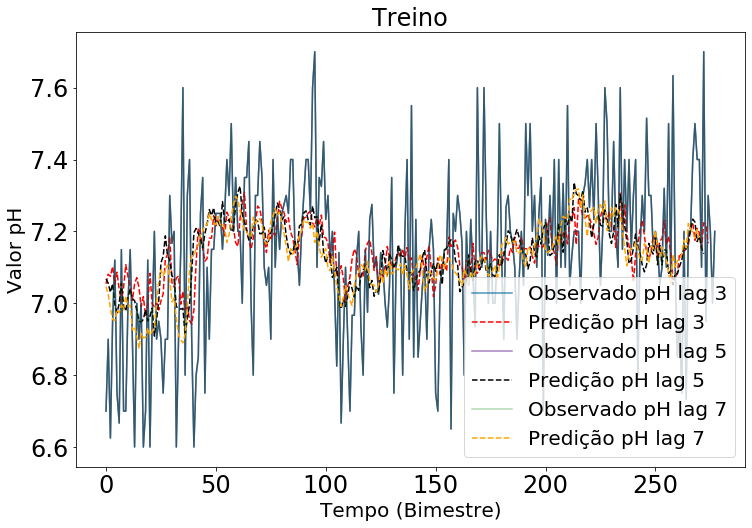

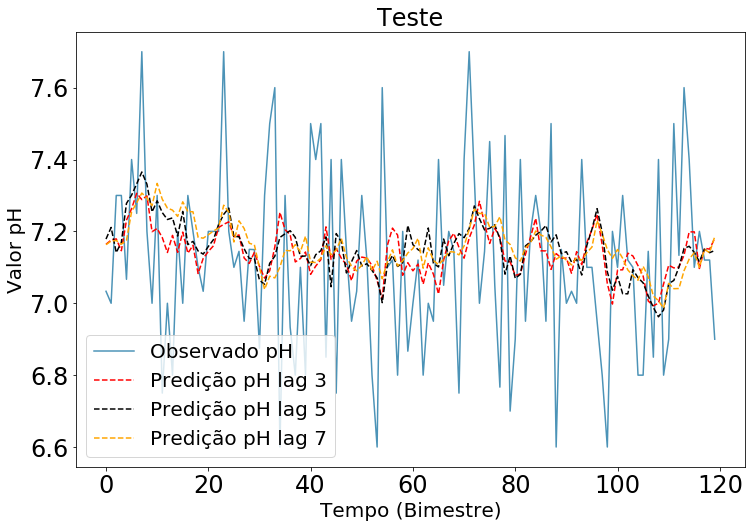

In [10]:
#lags = (3,5,7) 
for l in range(1, 9, 2):
    
    lags = l
    
    #seleciona os dados
    
    train,train_previsao, test = pegar_dados_coluna_predita_train_test(trainingd,0.70,4) 
    
    #normalização dos dados
    train,test,testd = normalizacao(train,test)
    normalizador_previsao = MinMaxScaler()
    sc = MinMaxScaler()
    normalizador_previsao.fit_transform(train_previsao)
    
    #Prepara os dados de treinamento
    #Vai predizer o valor da coluna 4 (valor ph)
    train_X, train_y = prepara_dados(train, lags,4)
    
    #Prepara os dados de teste
    entradas = trainingd[len(trainingd) - len(test) - lags:].values
    entradas = sc.fit_transform(entradas)   
    
    test_X = []
    for i in range(lags, lags+len(test)):
        test_X.append(entradas[i-lags:i, 0:8])
    test_X = np.array(test_X)
    
    #Nivelar entrada
    #   n_input = train_X.shape[1] * train_X.shape[2]
    
    #  test_X = test_X.reshape((test_X.shape[0],n_input))
    
    #train_X = train_X.reshape((train_X.shape[0],n_input))

    model = Sequential()
    model.add(LSTM(units = 10, input_shape = (train_X.shape[1], 8)))
    model.add(Dense(10, activation = 'linear'))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation = 'linear'))
    model.compile(loss = 'mean_absolute_error', optimizer = 'adam',
                  metrics = ['mean_absolute_error'])


    #Treina o modelo
    model.fit(train_X, train_y, batch_size = 32, epochs = 100)
    
    #Dados de teste
    previsoes = model.predict(test_X)
    #previsoes = previsoes.reshape(-1, 1)
    previsoes = normalizador_previsao.inverse_transform(previsoes)
    
    ptest = []
    for p in range(len(test)):
        ptest.append(previsoes[p])
        
    previsoes = ptest
       
    print('Teste - Gráficos com lag', l)
    #Plotagem do gráfico
    plt.plot(testd,color='red',label = 'Observado')
    plt.plot(previsoes,color='blue',label = 'Previsoes')
    plt.xlabel('Tempo')
    plt.ylabel('Valor pH')
    plt.legend()
    plt.show()
    
    #Dados de treino
    previsoes_treino = model.predict(train_X)
    previsoes_treino = previsoes_treino.reshape(-1, 1)
    previsoes_treino = normalizador_previsao.inverse_transform(previsoes_treino)
    
    treino = train_previsao[lags: len(previsoes_treino) + lags, :]
    observado_test = testd
    
    observado_treino = train_previsao  
    
    
    ptreino = []
    for p in range(len(treino)):
        ptreino.append(previsoes_treino[p])
        
    previsoes_treino = ptreino
    
    print('Treinamento - Gráficos com lag', l)
    #Plotagem do gráfico
    plt.plot(train_previsao,color='red',label = 'Observado')
    plt.plot(previsoes_treino,color='blue',label = 'Previsoes')
    plt.xlabel('Tempo')
    plt.ylabel('Valor pH')
    plt.legend()
    plt.show()
            
      
    
    #Calculo do erro da previsão MAPE, RMSE e R²
    
    if l == 1:
        observado_treino_d = observado_treino
        previsoes_treino_d = previsoes_treino
        previsoes_d        = previsoes
        
        mape_treino_d        = round(mape(previsoes_treino,treino)[0],4)
        rmse_treino_d        = round(rmse(previsoes_treino,treino),4)
        r_treino_d           = round(r2(previsoes_treino,treino),4)
        
        mape_teste_d        = round(mape(previsoes,observado_test)[0],4)
        rmse_teste_d        = round(rmse(previsoes,observado_test),4)
        r_teste_d           = round(r2(previsoes,observado_test),4)        
    elif l == 3:
        observado_treino_a = observado_treino
        previsoes_treino_a = previsoes_treino
        previsoes_a        = previsoes
        
        mape_treino_a        = round(mape(previsoes_treino,treino)[0],4)
        rmse_treino_a        = round(rmse(previsoes_treino,treino),4)
        r_treino_a           = round(r2(previsoes_treino,treino),4)
        
        mape_teste_a        = round(mape(previsoes,observado_test)[0],4)
        rmse_teste_a        = round(rmse(previsoes,observado_test),4)
        r_teste_a           = round(r2(previsoes,observado_test),4)
        
    elif l == 5:
        observado_treino_b = observado_treino
        previsoes_treino_b = previsoes_treino
        previsoes_b        = previsoes
        
        mape_treino_b        = round(mape(previsoes_treino,treino)[0],4)
        rmse_treino_b        = round(rmse(previsoes_treino,treino),4)
        r_treino_b           = round(r2(previsoes_treino,treino),4)
        
        mape_teste_b        = round(mape(previsoes,observado_test)[0],4)
        rmse_teste_b        = round(rmse(previsoes,observado_test),4)
        r_teste_b           = round(r2(previsoes,observado_test),4)
        
    else:
        observado_treino_c = observado_treino
        previsoes_treino_c = previsoes_treino
        previsoes_c        = previsoes
        
        mape_treino_c        = round(mape(previsoes_treino,treino)[0],4)
        rmse_treino_c        = round(rmse(previsoes_treino,treino),4)
        r_treino_c           = round(r2(previsoes_treino,treino),4)
        
        mape_teste_c        = round(mape(previsoes,observado_test)[0],4)
        rmse_teste_c        = round(rmse(previsoes,observado_test),4)
        r_teste_c           = round(r2(previsoes,observado_test),4)
        
#Plotagem do gráfico

plt.plot(observado_treino_a, color = '#006699', alpha=0.7, label = 'Observado pH lag 3')
plt.plot(previsoes_treino_a, color = 'red',linestyle = '--', label = 'Predição pH lag 3')
plt.plot(observado_treino_b, color = 'indigo', alpha=0.5, label = 'Observado pH lag 5')
plt.plot(previsoes_treino_b, color = 'black',linestyle = '--', label = 'Predição pH lag 5')
plt.plot(observado_treino_c, color = 'green', alpha=0.3, label = 'Observado pH lag 7')
plt.plot(previsoes_treino_c, color = 'orange',linestyle = '--', label = 'Predição pH lag 7')
plt.title('Treino')
plt.xlabel('Tempo (Bimestre)')
plt.ylabel('Valor pH')
plt.legend()
plt.show()

#Plotagem do gráfico

plt.plot(observado_test, color = '#006699', alpha=0.7, label = 'Observado pH')
plt.plot(previsoes_a, color = 'red',linestyle = '--', label = 'Predição pH lag 3')
plt.plot(previsoes_b, color = 'black',linestyle = '--', label = 'Predição pH lag 5')
plt.plot(previsoes_c, color = 'orange',linestyle = '--', label = 'Predição pH lag 7')
plt.title('Teste')
plt.xlabel('Tempo (Bimestre)')
plt.ylabel('Valor pH')
plt.legend()
plt.show()


# intialise data of lists.
data_treino = {'Lags':[1, 3, 5, 7],
        'MAPE':[mape_treino_d,mape_treino_a, mape_treino_b, mape_treino_c],
        'RMSE':[rmse_treino_d,rmse_treino_a, rmse_treino_b, rmse_treino_c],
        'R²':[r_treino_d,r_treino_a, r_treino_b, r_treino_c],
        'TIPO':['TREINO','TREINO', 'TREINO', 'TREINO']}

# intialise data of lists.
data_teste = {'Lags':[1, 3, 5, 7],
        'MAPE':[mape_teste_d,mape_teste_a, mape_teste_b, mape_teste_c],
        'RMSE':[rmse_teste_d,rmse_teste_a, rmse_teste_b, rmse_teste_c],
        'R²':[r_teste_d,r_teste_a, r_teste_b, r_teste_c],
        'TIPO':['TESTE','TESTE', 'TESTE', 'TESTE']}
 
# Create DataFrame
df_resultados_treino = pd.DataFrame(data_treino)
df_resultados_teste = pd.DataFrame(data_teste)
 

In [11]:
df_resultados_treino

,Lags,MAPE,RMSE,R²,TIPO
0,1,6.6259,0.2185,0.0834,TREINO
1,3,6.2253,0.2086,0.1513,TREINO
2,5,6.0763,0.2065,0.1718,TREINO
3,7,5.8959,0.2028,0.1843,TREINO


In [12]:
df_resultados_teste

,Lags,MAPE,RMSE,R²,TIPO
0,1,3.5925,0.2602,-0.0831,TESTE
1,3,3.4475,0.2552,-0.0415,TESTE
2,5,3.5156,0.2594,-0.0758,TESTE
3,7,3.4384,0.2564,-0.0515,TESTE
